In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/project/juvenile_arrests.csv')

In [6]:
data.head()

,Category,Offense,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Juvenile Arrest Rates (Arrest of Persons Age 1...,All crimes,6396.6,6370.3,6607.7,6073.9,6110.2,6466.1,6728.5,6808.2,...,5343.8,4856.9,4366.4,3940.3,3237.2,3060.6,2753.6,2552.9,2409.7,2167.1
1,Juvenile Arrest Rates (Arrest of Persons Age 1...,Murder and nonneglient manslaughter,5.8,6.6,6.1,5.1,4.6,5.3,5.9,6.4,...,3.5,3.0,2.5,2.2,2.3,2.3,2.4,2.6,2.7,2.7
2,Juvenile Arrest Rates (Arrest of Persons Age 1...,Forcible rape*,14.9,15.2,16.2,16.6,19.1,19.6,20.3,20.0,...,9.2,8.5,8.3,7.6,NaN,NaN,NaN,NaN,NaN,NaN
3,Juvenile Arrest Rates (Arrest of Persons Age 1...,Robbery,145.1,146.5,137.5,129.7,121.9,121.9,119.4,110.6,...,93.9,80.8,70.9,64.5,57.8,58.7,55.6,57.6,57.8,51.7
4,Juvenile Arrest Rates (Arrest of Persons Age 1...,Aggravated assault,129.6,128.5,133.9,128.0,133.2,145.6,158.0,158.4,...,146.8,132.2,120.6,108.2,92.3,90.3,85.4,83.7,83.9,83.1


In [7]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  147 non-null    object 
 1   Offense   147 non-null    object 
 2   1980      147 non-null    float64
 3   1981      147 non-null    float64
 4   1982      147 non-null    float64
 5   1983      147 non-null    float64
 6   1984      147 non-null    float64
 7   1985      147 non-null    float64
 8   1986      147 non-null    float64
 9   1987      147 non-null    float64
 10  1988      147 non-null    float64
 11  1989      147 non-null    float64
 12  1990      147 non-null    float64
 13  1991      147 non-null    float64
 14  1992      147 non-null    float64
 15  1993      147 non-null    float64
 16  1994      147 non-null    float64
 17  1995      147 non-null    float64
 18  1996      147 non-null    float64
 19  1997      147 non-null    float64
 20  1998      147 non-null    float6

,count,mean,std,min,25%,50%,75%,max
1980,147.0,708.610884,1564.503447,0.6,61.300,226.00,580.550,10320.8
1981,147.0,690.651020,1571.297559,0.5,59.400,204.90,555.200,11152.4
1982,147.0,707.282993,1632.503521,0.5,60.150,207.10,528.500,11731.8
1983,147.0,647.009524,1491.349653,0.4,54.450,186.90,464.050,10653.5
1984,147.0,646.268027,1483.785522,0.4,53.750,177.40,514.550,10453.3
1985,147.0,693.121088,1569.319857,0.7,57.700,189.70,547.100,10835.2
1986,147.0,711.418367,1622.322604,0.8,59.450,204.20,550.750,11388.0
1987,147.0,732.744218,1658.473754,0.9,60.600,200.80,576.400,11784.8
1988,147.0,789.568707,1785.192596,0.8,68.450,239.50,640.700,12966.0
1989,147.0,792.296599,1825.914154,1.0,67.950,244.20,642.500,13765.1


In [10]:
data.isnull().sum()

Category     0
Offense      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         7
2011         7
2012         7
2013        14
2014        14
2015        14
2016        14
2017        14
2018        14
dtype: int64

In [12]:
data['Offense'].value_counts

<bound method IndexOpsMixin.value_counts of 0                               All crimes
1      Murder and nonneglient manslaughter
2                           Forcible rape*
3                                  Robbery
4                       Aggravated assault
                      ...                 
142                     Disorderly conduct
143                   Curfew and loitering
144                           Running away
145                        Violent crimes*
146                   Property crime index
Name: Offense, Length: 147, dtype: object>

In [13]:
labels = data['Offense'].value_counts().index
values = data['1980'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label',
                             insidetextorientation='radial')])
fig.show()

In [14]:
labels = data['Offense'].value_counts().index
values = data['1985'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label',
                             insidetextorientation='radial')])
fig.show()

In [15]:
labels = data['Offense'].value_counts().index
values = data['1990'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label',
                             insidetextorientation='radial')])
fig.show()

# From the above charts, it is visible that the cases of 'Drunkenness' are steadily increasing with 4.76% in 1980, 8.7% in 1985 and 9.09% in 1990.

# The rate of Forcible Rape and Drug abuse violations cases are steady at 4.55% for the above years.



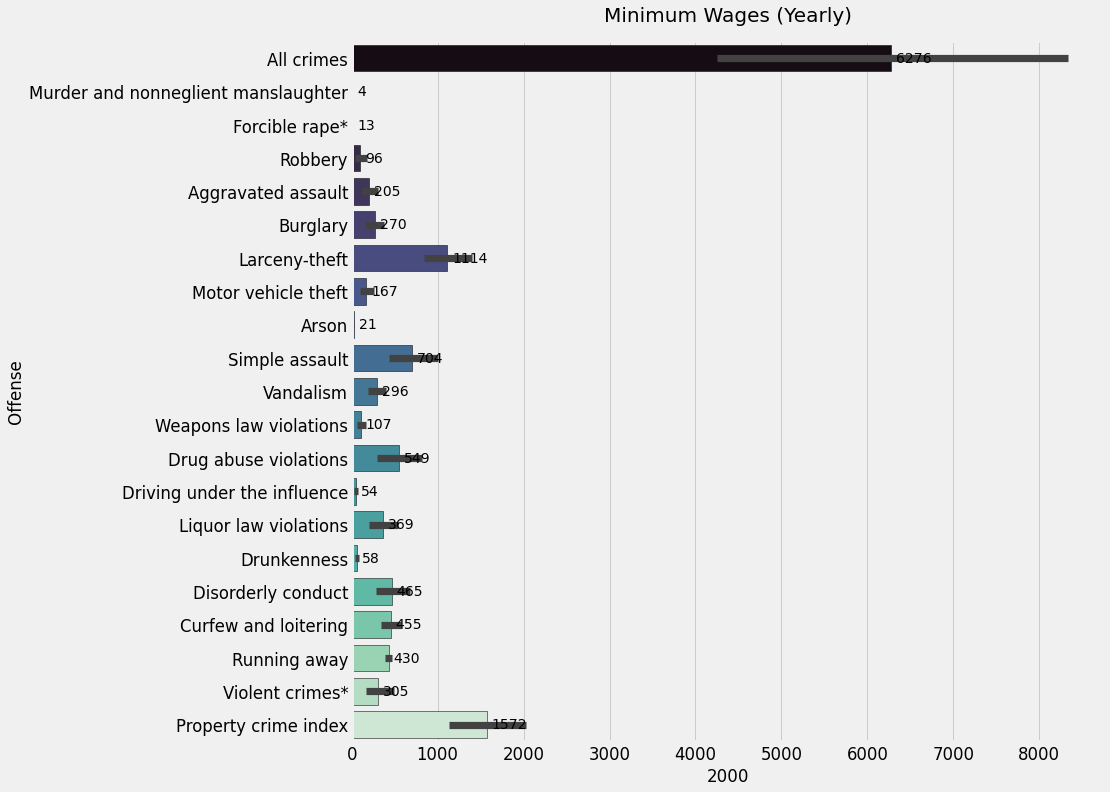

In [16]:
sns.set_context("talk")
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,12))
ax = sns.barplot(y = 'Offense' , x = '2000', data = data, palette = 'mako', edgecolor = 'black')
ax.set_title('Minimum Wages (Yearly)' , size = 20, pad = 20)
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

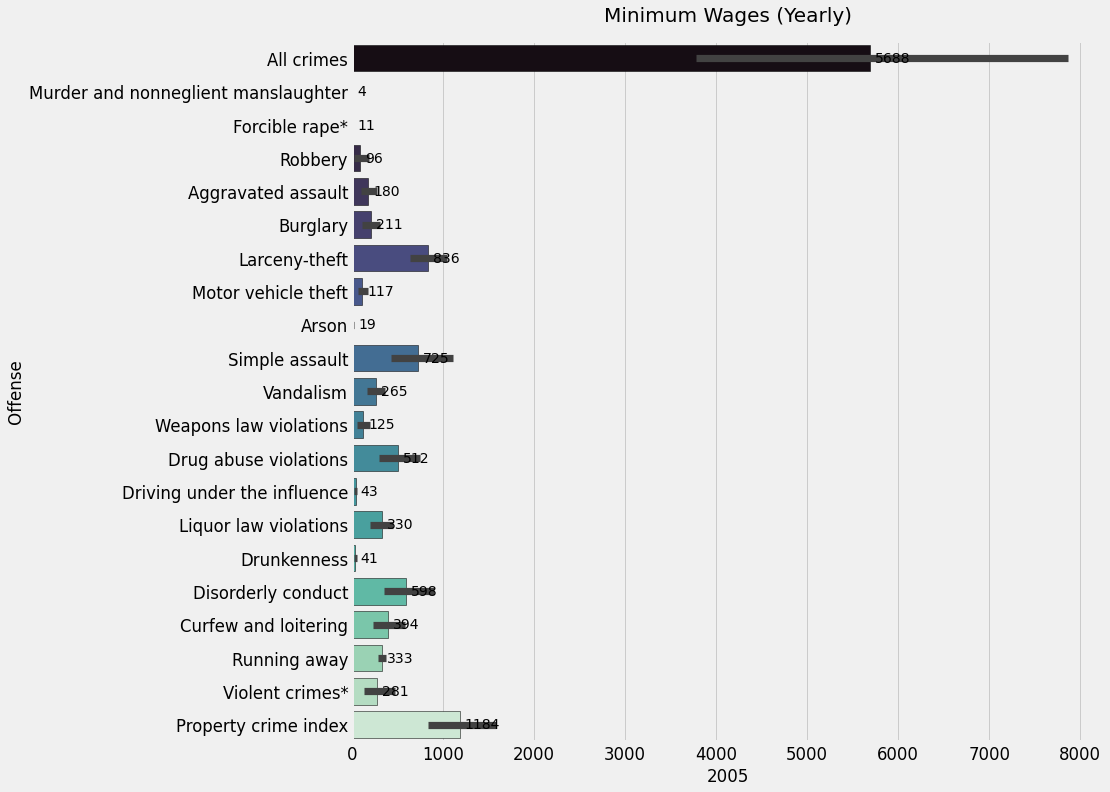

In [17]:
sns.set_context("talk")
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,12))
ax = sns.barplot(y = 'Offense' , x = '2005', data = data, palette = 'mako', edgecolor = 'black')
ax.set_title('Minimum Wages (Yearly)' , size = 20, pad = 20)
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

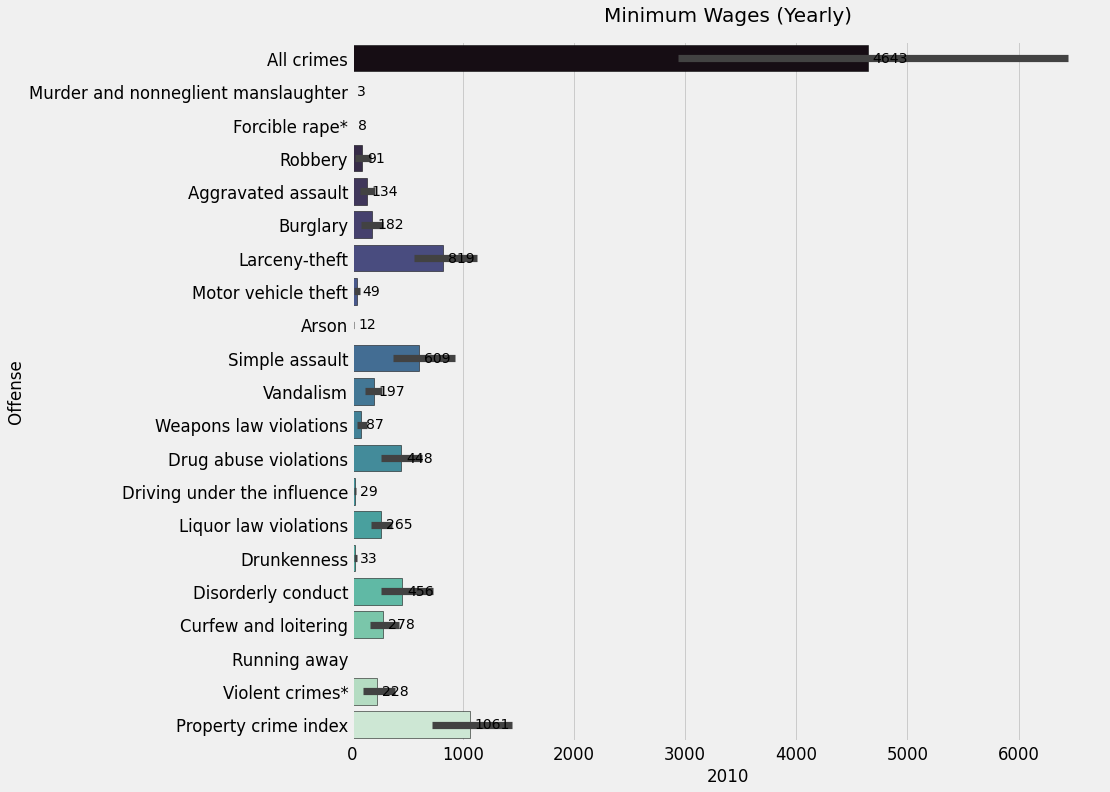

In [18]:
sns.set_context("talk")
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,12))
ax = sns.barplot(y = 'Offense' , x = '2010', data = data, palette = 'mako', edgecolor = 'black')
ax.set_title('Minimum Wages (Yearly)' , size = 20, pad = 20)
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# For the years 2000, 2005 and 2010 'Property Crimes' saw a steady rate and fail to deplete

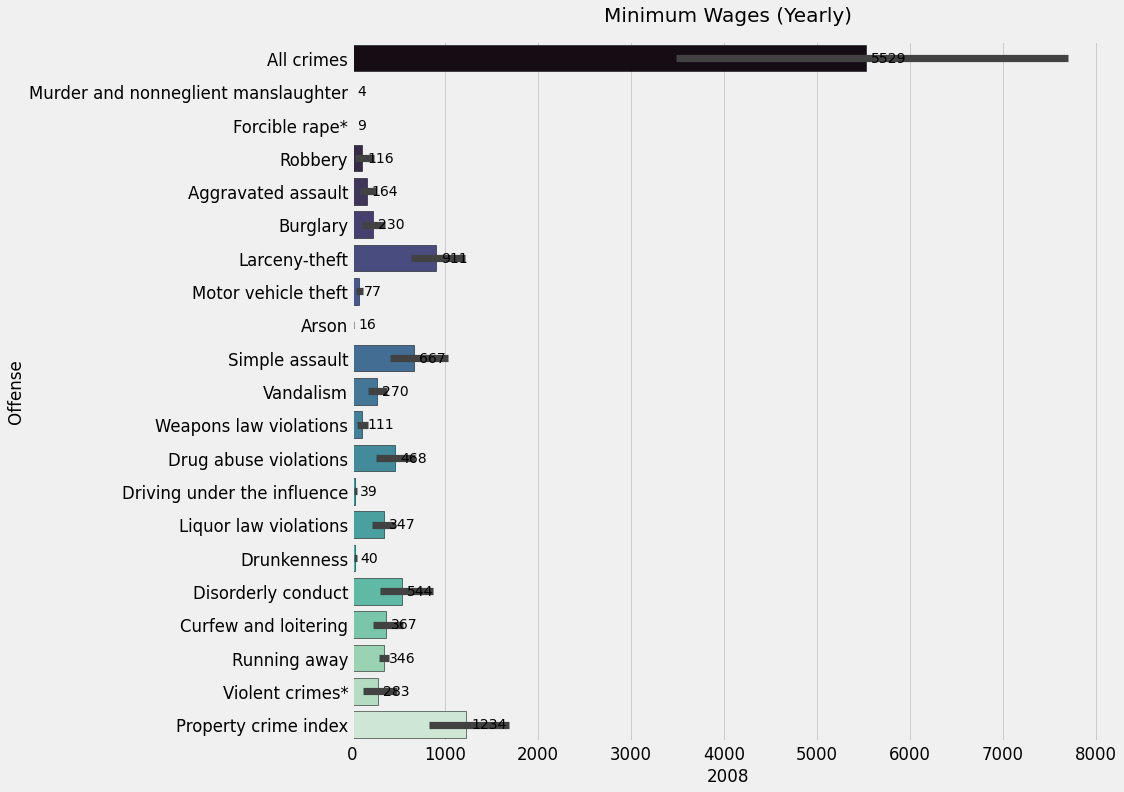

In [19]:
sns.set_context("talk")
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,12))
ax = sns.barplot(y = 'Offense' , x = '2008', data = data, palette = 'mako', edgecolor = 'black')
ax.set_title('Minimum Wages (Yearly)' , size = 20, pad = 20)
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# The year of 2008 witnessed a massive global housing crisis and the results are visible. Surprisingly drunkenness have now taken a back seat|

In [20]:
# Missing values
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing==>descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


missing_values= missing_values_table(data)
missing_values.style.background_gradient(cmap='Reds')  

Your selected dataframe has 41 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
2013,14,9.500000
2014,14,9.500000
2015,14,9.500000
2016,14,9.500000
2017,14,9.500000
2018,14,9.500000
2010,7,4.800000
2011,7,4.800000
2012,7,4.800000


# we have missing values from 2010 to 2018.
# 7 missing values/column from 2010 to 2012 (9.5%)
# 14 missing values/column from 2013 to 2018 (4.8%)



> We should impute the missing values with median

In [24]:
median_value=data['2010'].median()
data['2010']=data['2010'].fillna(median_value)

In [25]:
data['2010'].isnull().sum()

0

# We have filled the null values with median and rechecked for 2010

In [26]:
median_value=data['2011'].median()
data['2011']=data['2011'].fillna(median_value)

median_value=data['2012'].median()
data['2012']=data['2012'].fillna(median_value)

median_value=data['2013'].median()
data['2013']=data['2013'].fillna(median_value)

median_value=data['2014'].median()
data['2014']=data['2014'].fillna(median_value)

median_value=data['2015'].median()
data['2015']=data['2015'].fillna(median_value)

median_value=data['2016'].median()
data['2016']=data['2016'].fillna(median_value)

median_value=data['2017'].median()
data['2017']=data['2017'].fillna(median_value)

median_value=data['2018'].median()
data['2018']=data['2018'].fillna(median_value)

# Let us look at the different types of crimes for which there have been juvenile arrests

In [28]:
Offense = data['Offense'].value_counts()
print(f'Total number of crimes in the dataset : {len(Offense)}')
print(Offense.index)

Total number of crimes in the dataset : 21
Index(['All crimes', 'Weapons law violations', 'Violent crimes*',
       'Running away', 'Curfew and loitering', 'Disorderly conduct',
       'Drunkenness', 'Liquor law violations', 'Driving under the influence',
       'Drug abuse violations', 'Vandalism',
       'Murder and nonneglient manslaughter', 'Simple assault', 'Arson',
       'Motor vehicle theft', 'Larceny-theft', 'Burglary',
       'Aggravated assault', 'Robbery', 'Forcible rape*',
       'Property crime index'],
      dtype='object')


In [29]:
data['Decade1'] = data['1980']+data['1981']+data['1982']+data['1983']+data['1984']+data['1985']+data['1986']+data['1987']+data['1988']+data['1989']+data['1990']

In [30]:
data.drop(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990',],inplace=True,axis=1)

In [31]:
data.head()

,Category,Offense,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Decade1
0,Juvenile Arrest Rates (Arrest of Persons Age 1...,All crimes,7466.4,7294.5,7509.3,8157.2,8228.3,8476.2,8211.3,7421.4,...,4856.9,4366.4,3940.3,3237.2,3060.6,2753.6,2552.9,2409.7,2167.1,73408.9
1,Juvenile Arrest Rates (Arrest of Persons Age 1...,Murder and nonneglient manslaughter,11.9,11.3,12.8,12.3,10.7,8.9,7.6,6.5,...,3.0,2.5,2.2,2.3,2.3,2.4,2.6,2.7,2.7,75.5
2,Juvenile Arrest Rates (Arrest of Persons Age 1...,Forcible rape*,22.4,21.4,21.3,19.7,18.3,17.8,17.0,16.3,...,8.5,8.3,7.6,98.2,101.8,87.2,88.9,88.1,71.3,204.6
3,Juvenile Arrest Rates (Arrest of Persons Age 1...,Robbery,158.6,159.3,167.5,183.5,181.9,159.9,126.9,106.2,...,80.8,70.9,64.5,57.8,58.7,55.6,57.6,57.8,51.7,1432.6
4,Juvenile Arrest Rates (Arrest of Persons Age 1...,Aggravated assault,240.7,257.8,268.8,282.0,275.7,244.5,240.3,224.2,...,132.2,120.6,108.2,92.3,90.3,85.4,83.7,83.9,83.1,1753.9


 We have dropped the columns from 1980 to 1990 and clubbed them under Decade 1 for our convenience

 Since the time frame oscillaytes from 1980 to 2018, i.e 38 columns. 
 The number of features are more, which leads to over fitting.
 
Hence, we decide to categorise it into 4 decades (Decade1,2,3,4).
Decade is a 10 year time period

We shall henceforth, perform Decade-wise Analysis

In [32]:
data['Decade2'] = data['1991']+data['1992']+data['1993']+data['1994']+data['1995']+data['1996']+data['1997']+data['1998']+data['1999']+data['2000']


In [33]:
data.drop(['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000',],inplace=True,axis=1)

In [34]:
data.head()

,Category,Offense,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,Decade1,Decade2
0,Juvenile Arrest Rates (Arrest of Persons Age 1...,All crimes,6202.2,6232.4,6078.1,5998.2,5907.1,6072.8,5983.5,5833.6,...,4366.4,3940.3,3237.2,3060.6,2753.6,2552.9,2409.7,2167.1,73408.9,76015.4
1,Juvenile Arrest Rates (Arrest of Persons Age 1...,Murder and nonneglient manslaughter,3.8,3.9,3.7,3.2,3.7,3.7,3.9,3.7,...,2.5,2.2,2.3,2.3,2.4,2.6,2.7,2.7,75.5,90.0
2,Juvenile Arrest Rates (Arrest of Persons Age 1...,Forcible rape*,13.5,13.7,12.2,12.2,11.6,10.4,10.4,9.7,...,8.3,7.6,98.2,101.8,87.2,88.9,88.1,71.3,204.6,182.3
3,Juvenile Arrest Rates (Arrest of Persons Age 1...,Robbery,79.4,72.7,74.1,74.0,84.4,101.3,100.2,103.7,...,70.9,64.5,57.8,58.7,55.6,57.6,57.8,51.7,1432.6,1418.8
4,Juvenile Arrest Rates (Arrest of Persons Age 1...,Aggravated assault,192.9,181.9,177.5,174.5,177.0,174.9,165.6,163.2,...,120.6,108.2,92.3,90.3,85.4,83.7,83.9,83.1,1753.9,2441.3


In [35]:
data['Decade3'] = data['2001']+data['2002']+data['2003']+data['2004']+data['2005']+data['2006']+data['2007']+data['2008']+data['2009']+data['2010']


In [36]:
data.drop(['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',],inplace=True,axis=1)

In [37]:
data.head()

,Category,Offense,2011,2012,2013,2014,2015,2016,2017,2018,Decade1,Decade2,Decade3
0,Juvenile Arrest Rates (Arrest of Persons Age 1...,All crimes,4366.4,3940.3,3237.2,3060.6,2753.6,2552.9,2409.7,2167.1,73408.9,76015.4,58508.6
1,Juvenile Arrest Rates (Arrest of Persons Age 1...,Murder and nonneglient manslaughter,2.5,2.2,2.3,2.3,2.4,2.6,2.7,2.7,75.5,90.0,36.1
2,Juvenile Arrest Rates (Arrest of Persons Age 1...,Forcible rape*,8.3,7.6,98.2,101.8,87.2,88.9,88.1,71.3,204.6,182.3,111.4
3,Juvenile Arrest Rates (Arrest of Persons Age 1...,Robbery,70.9,64.5,57.8,58.7,55.6,57.6,57.8,51.7,1432.6,1418.8,864.5
4,Juvenile Arrest Rates (Arrest of Persons Age 1...,Aggravated assault,120.6,108.2,92.3,90.3,85.4,83.7,83.9,83.1,1753.9,2441.3,1686.5


In [38]:
data['Decade4'] = data['2011']+data['2012']+data['2013']+data['2014']+data['2015']+data['2016']+data['2017']+data['2018']


In [39]:
data.drop(['2011','2012','2013','2014','2015','2016','2017','2018'],inplace=True,axis=1)

In [40]:
data.head()

,Category,Offense,Decade1,Decade2,Decade3,Decade4
0,Juvenile Arrest Rates (Arrest of Persons Age 1...,All crimes,73408.9,76015.4,58508.6,24487.8
1,Juvenile Arrest Rates (Arrest of Persons Age 1...,Murder and nonneglient manslaughter,75.5,90.0,36.1,19.7
2,Juvenile Arrest Rates (Arrest of Persons Age 1...,Forcible rape*,204.6,182.3,111.4,551.4
3,Juvenile Arrest Rates (Arrest of Persons Age 1...,Robbery,1432.6,1418.8,864.5,474.6
4,Juvenile Arrest Rates (Arrest of Persons Age 1...,Aggravated assault,1753.9,2441.3,1686.5,747.5


# The columns have now been clubbed under 4 decades. We shall delete the category column now

In [41]:
data.drop(['Category'],inplace=True,axis=1)
data.head()

,Offense,Decade1,Decade2,Decade3,Decade4
0,All crimes,73408.9,76015.4,58508.6,24487.8
1,Murder and nonneglient manslaughter,75.5,90.0,36.1,19.7
2,Forcible rape*,204.6,182.3,111.4,551.4
3,Robbery,1432.6,1418.8,864.5,474.6
4,Aggravated assault,1753.9,2441.3,1686.5,747.5


# **We shall now perform the analysis on the newly formed dataset

In [42]:
data[data.Offense =='Drunkenness'].Decade1.mean()

1132.3

In [43]:
data[data.Offense =='Drunkenness'].Decade2.mean()

629.5714285714286

In [44]:
data[data.Offense =='Drunkenness'].Decade3.mean()

416.5857142857143

In [45]:
data[data.Offense =='Drunkenness'].Decade4.mean()

162.45714285714286

# We analysed Drunkenness for all the 4 decades and to our surprise, the mean juvenile arrests declined 7x

In [46]:
data.groupby('Offense').Decade1.agg(['count','max','min','mean'])


,count,max,min,mean
Offense,,,,
Aggravated assault,7,4862.9,496.1,1891.185714
All crimes,7,127592.5,28454.7,72514.742857
Arson,7,446.9,54.7,245.085714
Burglary,7,11951.7,942.7,6413.657143
Curfew and loitering,7,5076.6,1446.4,3098.385714
Disorderly conduct,7,8590.1,601.2,4049.842857
Driving under the influence,7,1750.4,150.2,832.828571
Drug abuse violations,7,6719.4,1038.7,3314.871429
Drunkenness,7,2462.0,109.4,1132.300000


In [47]:
data.groupby('Offense').Decade2.agg(['count','max','min','mean'])

,count,max,min,mean
Offense,,,,
Aggravated assault,7,6336.2,838.2,2586.528571
All crimes,7,136230.5,30109.5,75932.171429
Arson,7,483.9,68.5,264.257143
Burglary,7,7327.2,832.4,4072.528571
Curfew and loitering,7,6755.8,1995.9,4484.185714
Disorderly conduct,7,11769.1,1106.6,5374.457143
Driving under the influence,7,953.7,137.0,515.071429
Drug abuse violations,7,12232.1,1203.3,5187.628571
Drunkenness,7,1117.9,94.9,629.571429


In [48]:
data.groupby('Offense').Decade3.agg(['count','max','min','mean'])

,count,max,min,mean
Offense,,,,
Aggravated assault,7,4118.70,439.10,1714.757143
All crimes,7,104007.70,17181.70,55962.957143
Arson,7,340.60,53.80,178.914286
Burglary,7,4370.60,551.90,2227.985714
Curfew and loitering,7,7795.90,1125.60,3724.914286
Disorderly conduct,7,12797.10,961.80,5452.900000
Driving under the influence,7,804.90,123.90,436.757143
Drug abuse violations,7,9076.60,1212.80,4981.214286
Drunkenness,7,716.10,79.00,416.585714


In [49]:
data.groupby('Offense').Decade4.agg(['count','max','min','mean'])

,count,max,min,mean
Offense,,,,
Aggravated assault,7,1941.2,162.4,780.900000
All crimes,7,50496.8,5859.7,24483.985714
Arson,7,120.1,18.0,68.685714
Burglary,7,2358.8,203.9,957.600000
Curfew and loitering,7,2937.8,299.7,1208.028571
Disorderly conduct,7,5421.6,276.7,2151.028571
Driving under the influence,7,257.2,46.9,154.457143
Drug abuse violations,7,4232.1,682.2,2484.414286
Drunkenness,7,357.8,36.2,162.457143
